In [14]:
from sklearn.datasets import make_blobs # Synthetic dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [16]:
# Create the normal data
X_normal, y_normal = make_blobs(n_samples = 500, centers = 3, n_features = 2, cluster_std = 1, random_state = 42)
df_normal = pd.DataFrame({'feature1': X_normal[:, 0], 'feature2': X_normal[:, 1], 'anomaly_indicator': 0})
# Create the anomaly data
X_anomaly, y_anomaly = make_blobs(n_samples = 20, centers = 2, n_features = 2, cluster_std = 10, random_state = 0)
df_anomaly = pd.DataFrame({'feature1': X_anomaly[:, 0], 'feature2': X_anomaly[:, 1], 'anomaly_indicator': 1})
# Combine the normal and the anomaly data
df = pd.concat([df_normal, df_anomaly])

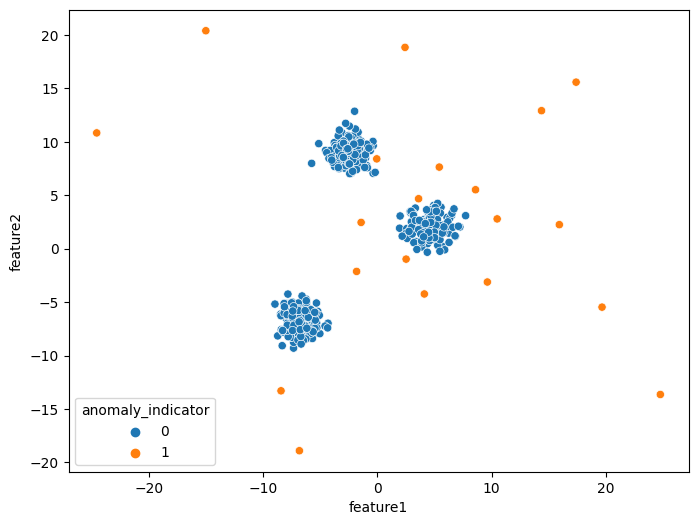

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df['feature1'], y = df['feature2'], hue = df['anomaly_indicator'])
plt.show()

In [18]:
# Model dataset
X = df[df.columns.difference(['anomaly_indicator'])]
# GMM model
gmm = GaussianMixture(n_components = 3, n_init = 5, random_state = 42)
# Fit and predict on the data
y_gmm = gmm.fit_predict(X)

In [19]:
# Get the score for each sample
score = gmm.score_samples(X)
# Save score as a column
df['score'] = score
# Get the score threshold for anomaly
pct_threshold = np.percentile(score, 4)
# Print the score threshold
print(f'The threshold of the score is {pct_threshold:.2f}')
# Label the anomalies
df['anomaly_gmm_pct'] = df['score'].apply(lambda x: 1 if x < pct_threshold else 0)

The threshold of the score is -6.56


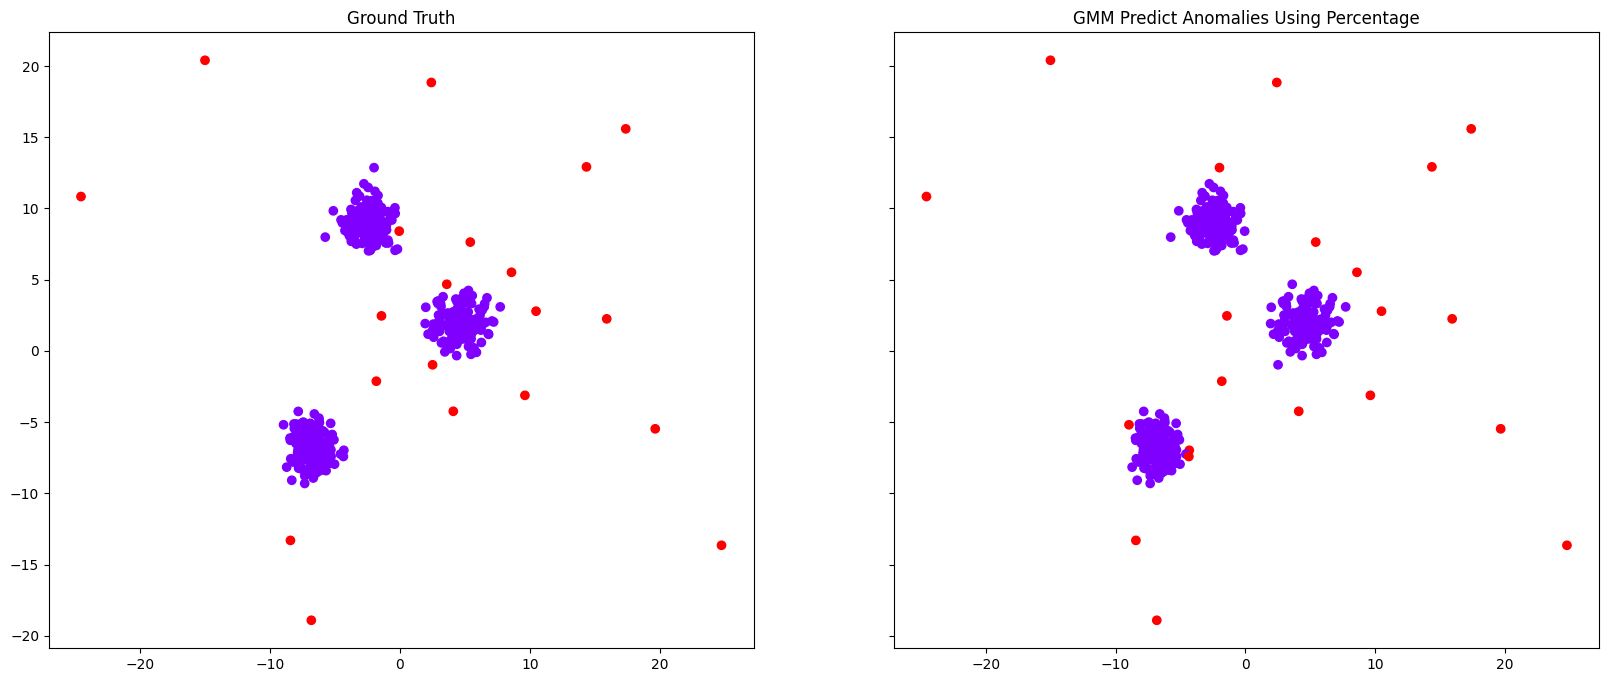

In [20]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1) = plt.subplots(1, 2, sharey = True, figsize = (20, 8))
# Ground truth
ax0.set_title('Ground Truth')
ax0.scatter(df['feature1'], df['feature2'], c = df['anomaly_indicator'], cmap = 'rainbow')
# GMM Predictions
ax1.set_title('GMM Predict Anomalies Using Percentage')
ax1.scatter(df['feature1'], df['feature2'], c = df['anomaly_gmm_pct'], cmap = 'rainbow')

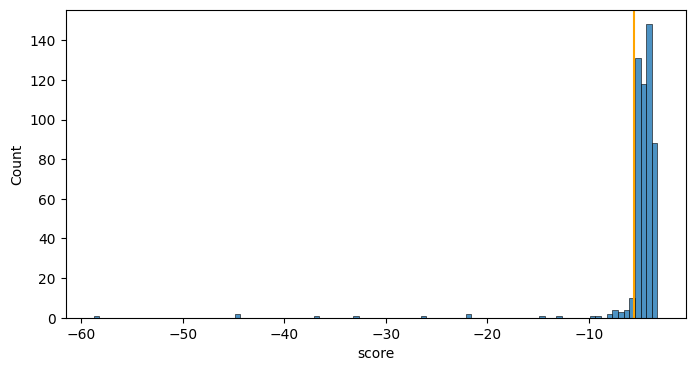

In [22]:
# Change figure size
plt.figure(figsize = (8, 4))
# Check score distribution
sns.histplot(df['score'], bins = 100, alpha = 0.8)
# Threshold value
plt.axvline(x = -5.5, color = 'orange')

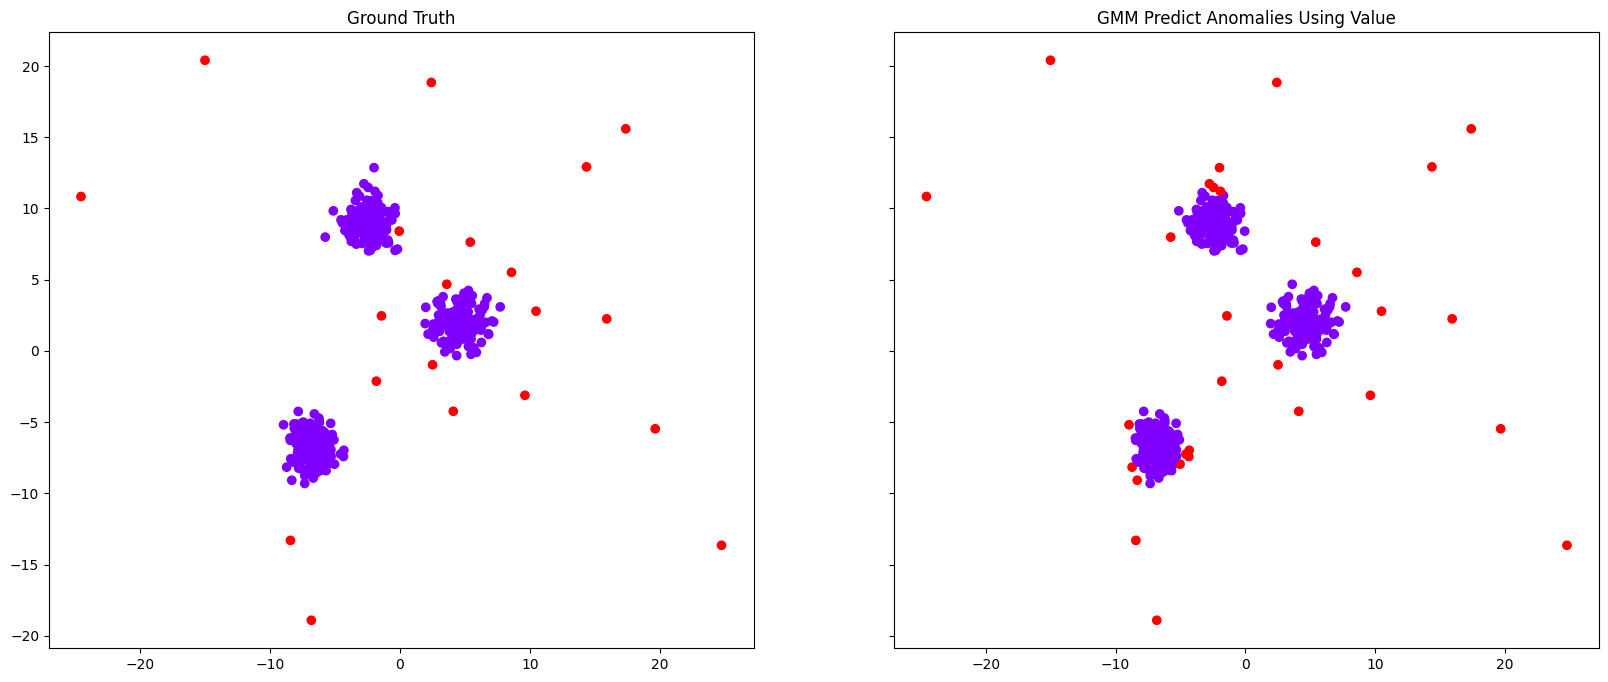

In [23]:
# Get the score threshold for anomaly
value_threshold = -5.5
# Label the anomalies
df['anomaly_gmm_value'] = df['score'].apply(lambda x: 1 if x < value_threshold else 0)
# Visualize the actual and predicted anomalies
fig, (ax0, ax1) = plt.subplots(1, 2, sharey = True, figsize = (20, 8))
# Ground truth
ax0.set_title('Ground Truth')
ax0.scatter(df['feature1'], df['feature2'], c = df['anomaly_indicator'], cmap = 'rainbow')
# GMM Predictions
ax1.set_title('GMM Predict Anomalies Using Value')
ax1.scatter(df['feature1'], df['feature2'], c = df['anomaly_gmm_value'], cmap = 'rainbow')